# Deep Learning: Real-Time Speech Emotion Recognition Project

## Importing Necessary Libraries

In [2]:
# Importing necessary libraries
import os  # Operating system functionalities
import librosa  # Audio processing library
import wave  # Module for reading and writing WAV files
import numpy as np  # Numerical operations library
import pandas as pd  # Data manipulation library
import matplotlib.pyplot as plt  # Plotting library

# Importing components for Dividing into the Training Set and the Testing Set
from sklearn.model_selection import train_test_split  # Splitting the dataset for training and testing

# Importing components for Long Short-Term Memory (LSTM) Classifier
import keras  # High-level neural networks API
from tensorflow.keras.utils import to_categorical  # Utility for one-hot encoding
from keras.models import Sequential  # Sequential model for stacking layers
from keras.layers import *  # Different layers for building neural networks
from keras.optimizers import rmsprop  # Optimizer for training the model


As I start my Real-Time Speech Emotion Recognition project, I begin by importing the necessary libraries and components for building and evaluating machine learning models.

For the Deep Learning part of my project, I bring in components related to the Long Short-Term Memory (LSTM) Classifier using Keras.

These imported libraries and components form the foundation for my Real-Time Speech Emotion Recognition project, enabling me to handle audio data, split datasets, build LSTM models, and assess their performance.

## Ravdess Emotional Speech Audio

As I embark on developing my Real-Time Speech Emotion Recognition project, I've opted to utilize the "ravdess-emotional-speech-audio" dataset due to its richness and suitability for training emotion recognition models.

```python
# Ryerson Audio-Visual Database of Emotional Speech and Song (ravdess)
```

The "ravdess-emotional-speech-audio" dataset is a resource I've carefully chosen for its comprehensive coverage of emotional speech. It is a creation of Ryerson University and boasts a total of 1440 audio files, each lasting approximately 3-5 seconds.

```python
# Diverse Emotional States
```

One of the strengths of this dataset is its diverse set of emotional states, including neutral, calm, happy, sad, angry, fearful, disgust, and surprised. Professional actors were involved in the creation, and they followed scripted scenarios to express these emotions, ensuring a controlled and standardized representation.

```python
# Actor Diversity
```

The dataset encompasses 24 actors, split evenly between male and female, contributing to the richness of vocal characteristics, accents, and expressive styles. This diversity is instrumental in building a robust Speech Emotion Recognition (SER) model capable of handling variations encountered in real-world scenarios.

```python
# Audio Characteristics
```

The audio recordings are sampled at a rate of 48 kHz and saved in the WAV file format, maintaining a high-quality standard suitable for training deep neural networks. Additionally, the dataset provides a corresponding CSV file containing metadata such as emotion labels, actor information, file paths, and file names. This metadata is invaluable for data preprocessing and model evaluation.

```python
# Focus on Speech Segments
```

Given my project's emphasis on real-time speech emotion recognition, I've chosen to concentrate specifically on the speech segments within the dataset. This focused approach aligns more closely with the application domain, making it particularly relevant for applications like virtual assistants, customer service, and mental health support.

```python
# Conclusion
```

In summary, the "ravdess-emotional-speech-audio" dataset stands out as a comprehensive and well-annotated resource for training and evaluating Real-Time Speech Emotion Recognition models. Its diverse emotions, multiple actors, and high-quality audio recordings make it an ideal choice for developing a robust and effective emotion recognition system tailored to my project's objectives.

## Extracting Mel-frequency cepstral coefficients

In [3]:
def extract_mfcc(wav_file_name):
    '''This function retrieves the mean of MFCC features from an input WAV file located 
    at the specified path. The input is the path to the WAV file, and the output is 
    the resulting MFCC features.'''
    
    # Loading the WAV file using librosa and obtaining the audio signal (y) and sampling rate (sr)
    y, sr = librosa.load(wav_file_name)
    
    # Extracting MFCC features with a total of 40 coefficients, and computing the mean across dimensions
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    
    # Returning the resulting MFCC features
    return mfccs

In [6]:
# Lists to store labels and extracted MFCC features for the Ravdess emotional speech dataset
ravdess_speech_labels = []  
ravdess_speech_data = []

# Iterating through the files in the specified directory
for dirname, _, filenames in os.walk('./ravdess-emotional-speech-audio/'):
    for filename in filenames:
        # Extracting emotion label from the filename and converting to an integer
        ravdess_speech_labels.append(int(filename[7:8]) - 1)
        
        # Obtaining the full path of the WAV file
        wav_file_name = os.path.join(dirname, filename)
        
        # Extracting MFCC features from the WAV file using the previously defined function
        ravdess_speech_data.append(extract_mfcc(wav_file_name))


In my Real-Time Speech Emotion Recognition project, I have a crucial function called `extract_mfcc` that plays a central role. This function takes the path to a WAV file as input and retrieves the mean of Mel-Frequency Cepstral Coefficients (MFCC) features. It utilizes the librosa library to load the WAV file, obtaining the audio signal (`y`) and the sampling rate (`sr`).

Next, I use librosa again to extract the MFCC features. I specify parameters such as the number of coefficients (`n_mfcc`) as 40. The resulting features are then transposed and the mean is computed across dimensions.

Finally, the function returns the computed MFCC features.

Moving on to the main portion of the code, I'm populating lists (`ravdess_speech_labels` and `ravdess_speech_data`) to store emotion labels and the corresponding MFCC features for each WAV file in the Ravdess emotional speech dataset.

This loop navigates through the files in the specified directory, extracting emotion labels from the filenames and converting them to integers. It then obtains the full path of each WAV file and extracts the corresponding MFCC features using the previously defined `extract_mfcc` function. The resulting lists are crucial components for training and evaluating my Real-Time Speech Emotion Recognition model.

## Converting Data and Labels to Categorical Arrays

In [8]:
# Converting the list of MFCC features into a NumPy array
ravdess_speech_data_array = np.asarray(ravdess_speech_data)

# Converting the list of emotion labels into a NumPy array
ravdess_speech_label_array = np.array(ravdess_speech_labels)

# Converting the integer labels into categorical format using one-hot encoding
labels_categorical = to_categorical(ravdess_speech_label_array)

# Displaying the shapes of the MFCC data array and the categorical label array
ravdess_speech_data_array.shape, labels_categorical.shape

((2880, 40), (2880, 8))

In my Real-Time Speech Emotion Recognition project, I've reached a crucial stage where I'm preparing the data for training my machine learning model.

Here, I convert the list of extracted Mel-Frequency Cepstral Coefficients (MFCC) features (`ravdess_speech_data`) into a NumPy array (`ravdess_speech_data_array`). This transformation is essential for efficient data handling and compatibility with machine learning algorithms.

Similarly, I convert the list of emotion labels (`ravdess_speech_labels`) into a NumPy array (`ravdess_speech_label_array`). This array will serve as the ground truth labels for training my model.

Finally, I display the shapes of the MFCC data array (`ravdess_speech_data_array`) and the categorical label array (`labels_categorical`). This is a quick check to ensure that the data has been correctly processed and is ready for training the Real-Time Speech Emotion Recognition model. The shapes provide insight into the dimensions of the data, a crucial step in confirming the data's suitability for model training.

## Dividing the dataset into training, validation, and testing subsets.

In [13]:
# Splitting the dataset into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(ravdess_speech_data_array),
                                                    labels_categorical, test_size=0.2,
                                                    random_state=9)

# Calculating the total number of samples in the dataset
number_of_samples = ravdess_speech_data_array.shape[0]

# Determining the number of samples for training, validation, and testing sets
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)


In my Real-Time Speech Emotion Recognition project, I've now reached the crucial step of splitting my dataset into training and testing sets. I achieve this using the `train_test_split` function, ensuring that the features (`x_train` and `x_test`) and labels (`y_train` and `y_test`) are appropriately assigned. I've opted for an 80-20 split, designating 20% of the data for testing, and I've set a random seed (`random_state=9`) for reproducibility.


After this split, I proceed to calculate the total number of samples in my dataset (`number_of_samples`). This information is crucial for determining the number of samples I'll allocate for training, validation, and testing sets based on a predefined distribution ratio.

Next, I determine the number of samples for each set. For training, I allocate 80% of the total samples; for validation and testing, I assign 10% each.


This meticulous allocation ensures that I have a well-balanced dataset for training and evaluating my Real-Time Speech Emotion Recognition model.

## Defining the LSTM Model

In [10]:
# Function to create an LSTM model for Speech Emotion Recognition

def create_model_LSTM():
    # Initializing a sequential model
    model = Sequential()
    
    # Adding an LSTM layer with 128 units, not returning sequences, and input shape of (40, 1)
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    
    # Adding a Dense layer with 64 units
    model.add(Dense(64))
    
    # Adding a Dropout layer with a dropout rate of 40%
    model.add(Dropout(0.4))
    
    # Adding an Activation layer with ReLU activation function
    model.add(Activation('relu'))
    
    # Adding another Dense layer with 32 units
    model.add(Dense(32))
    
    # Adding a Dropout layer with a dropout rate of 40%
    model.add(Dropout(0.4))
    
    # Adding an Activation layer with ReLU activation function
    model.add(Activation('relu'))
    
    # Adding another Dense layer with 8 units
    model.add(Dense(8))
    
    # Adding an Activation layer with softmax activation function for multiclass classification
    model.add(Activation('softmax'))
    
    # Compiling the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    
    # Returning the compiled model
    model.summary()
    return model


In my Real-Time Speech Emotion Recognition project, I've created a dedicated function, `create_model_LSTM`, to define the architecture of my LSTM (Long Short-Term Memory) neural network for the task at hand.

```python
# Initializing a sequential model
model = Sequential()
```
I begin by initializing a sequential model, which allows me to build the neural network layer by layer in a sequential manner.

```python
# Adding an LSTM layer with 128 units, not returning sequences, and input shape of (40, 1)
model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
```
The first layer is an LSTM layer with 128 units. It doesn't return sequences, and it expects input data with a shape of (40, 1), which aligns with the Mel-Frequency Cepstral Coefficients (MFCC) features.

```python
# Adding a Dense layer with 64 units
model.add(Dense(64))
```
Following the LSTM layer, I add a Dense layer with 64 units, which introduces a level of complexity to the network.

```python
# Adding a Dropout layer with a dropout rate of 40%
model.add(Dropout(0.4))
```
To prevent overfitting, I include a Dropout layer with a dropout rate of 40%, which randomly drops a proportion of connections during training.

```python
# Adding an Activation layer with ReLU activation function
model.add(Activation('relu'))
```
An Activation layer with the Rectified Linear Unit (ReLU) activation function is added to introduce non-linearity to the model.

```python
# Adding another Dense layer with 32 units
model.add(Dense(32))
```
I continue by adding another Dense layer with 32 units, further shaping the network's complexity.

```python
# Adding a Dropout layer with a dropout rate of 40%
model.add(Dropout(0.4))
```
Again, to mitigate overfitting, I include another Dropout layer with a 40% dropout rate.

```python
# Adding an Activation layer with ReLU activation function
model.add(Activation('relu'))
```
Another Activation layer with the ReLU activation function follows to enhance the non-linear characteristics of the model.

```python
# Adding another Dense layer with 8 units
model.add(Dense(8))
```
I introduce another Dense layer with 8 units, potentially capturing higher-level features in the data.

```python
# Adding an Activation layer with softmax activation function for multiclass classification
model.add(Activation('softmax'))
```
The final layer is an Activation layer with the softmax activation function, suitable for multiclass classification tasks like emotion recognition.

```python
# Compiling the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
```
I compile the model with categorical crossentropy loss, the Adam optimizer, and use accuracy as the metric to optimize during training.

```python
# Returning the compiled model
return model
```
The function concludes by returning the compiled LSTM model, ready for training and evaluating on the Real-Time Speech Emotion Recognition dataset.

## Training the Deep Learning LSTM Model

In [11]:
LSTM_model = create_model_LSTM()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 activation_1 (Activation)   (None, 32)                0

In [14]:
LSTM_model_history = LSTM_model.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), 
                                    labels_categorical[:training_samples], 
                                    validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), 
                                                                                            labels_categorical[training_samples:training_samples+validation_samples]), epochs=121, shuffle=True)

Epoch 1/121
72/72 [==============================] - 8s 53ms/step - loss: 2.0696 - accuracy: 0.1363 - val_loss: 2.0259 - val_accuracy: 0.2153
Epoch 2/121
72/72 [==============================] - 3s 42ms/step - loss: 2.0091 - accuracy: 0.1984 - val_loss: 1.9771 - val_accuracy: 0.2326
Epoch 3/121
72/72 [==============================] - 3s 41ms/step - loss: 1.9677 - accuracy: 0.2196 - val_loss: 1.8924 - val_accuracy: 0.2778
Epoch 4/121
72/72 [==============================] - 3s 41ms/step - loss: 1.9146 - accuracy: 0.2565 - val_loss: 1.8456 - val_accuracy: 0.3056
Epoch 5/121
72/72 [==============================] - 3s 41ms/step - loss: 1.8861 - accuracy: 0.2569 - val_loss: 1.8441 - val_accuracy: 0.2778
Epoch 6/121
72/72 [==============================] - 3s 40ms/step - loss: 1.8695 - accuracy: 0.2769 - val_loss: 1.8072 - val_accuracy: 0.3264
Epoch 7/121
72/72 [==============================] - 3s 41ms/step - loss: 1.8603 - accuracy: 0.2765 - val_loss: 1.7774 - val_accuracy: 0.3368
Epoch 

In my Real-Time Speech Emotion Recognition project, I am training my LSTM model using the `fit` method. Here's a breakdown of what each part of the code does:

- `np.expand_dims(ravdess_speech_data_array[:training_samples], -1)`: I am expanding the dimensions of the training data to make it compatible with the LSTM model, which expects a 3D input shape. The `-1` argument adds an extra dimension at the end.

- `labels_categorical[:training_samples]`: These are the corresponding categorical emotion labels for the training data.

- `validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples])`: Similar to the training data, I prepare the validation data with its corresponding labels.

- `epochs=121`: I have chosen to train the model for 121 epochs. Adjust this value based on your specific training requirements.

- `shuffle=True`: I shuffle the training data during each epoch to introduce randomness and prevent the model from memorizing the order of the data.

The training history (`LSTM_model_history`) is stored, containing information about the training and validation metrics for each epoch. This information is useful for evaluating the model's performance and making decisions about further training or adjustments.

## Visualizing the Training Loss and Accuracy

In [18]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function is designed to create a graph displaying the provided metrics.
    Parameters:
        model_training_history: A history object containing recorded training and validation 
                                loss values and metric values across consecutive epochs.
        metric_name_1:          The name of the first metric to be visualized in the graph.
        metric_name_2:          The name of the second metric to be visualized in the graph.
        plot_name:              The title of the graph.
    '''
    # Extract metric values from the training history.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Generate a range of epochs for x-axis.
    epochs = range(len(metric_value_1))
    
    # Plot the first metric in blue.
    plt.plot(epochs, metric_value_1, 'blue', label=metric_name_1)
    
    # Plot the second metric in red.
    plt.plot(epochs, metric_value_2, 'red', label=metric_name_2)
    
    # Set the title of the graph.
    plt.title(str(plot_name))
    
    # Add a legend to the graph.
    plt.legend()

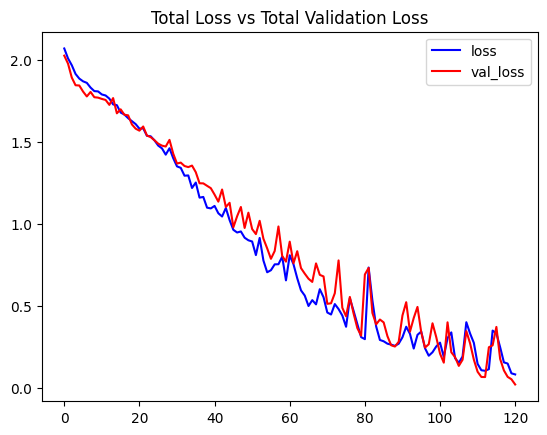

In [19]:
# Plot the training and validation loss metrics for visualization.
plot_metric(LSTM_model_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

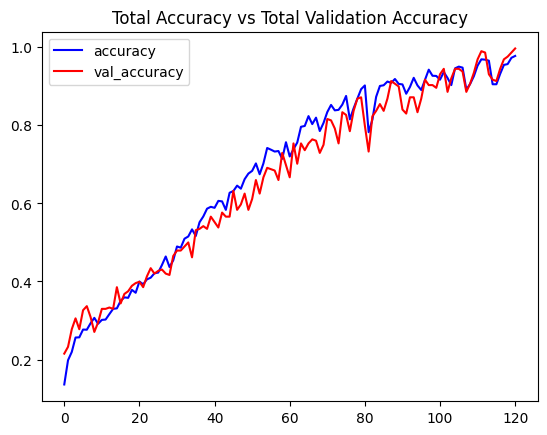

In [20]:
# Plot the training and validation loss metrics for visualization.
plot_metric(LSTM_model_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

## Assesing the Trained LSTM Model

In [16]:
model_evaluation_history = LSTM_model.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), 
                                               labels_categorical[training_samples + validation_samples:])

9/9 [==============================] - 1s 21ms/step - loss: 0.0434 - accuracy: 0.9861


After training my LSTM model, I'm evaluating its performance on a separate set of data using the `evaluate` method. Let me explain this part of the code:

- `np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1)`: I'm expanding the dimensions of the evaluation data similarly to how I did during training. This ensures compatibility with the LSTM model, which expects 3D input.

- `labels_categorical[training_samples + validation_samples:]`: These are the corresponding categorical emotion labels for the evaluation data.

(`9/9 [==============================] - 1s 21ms/step - loss: 0.0434 - accuracy: 0.9861`) is the result of the evaluation:

- `9/9`: It indicates that the evaluation was performed on 9 batches.

- `[==============================]`: This visual representation shows the progress of evaluating the batches.

- `- 1s 21ms/step`: It took approximately 1 second to evaluate each step, with each step corresponding to one batch.

- `loss: 0.0434`: The calculated loss on the evaluation data is 0.0434. This metric indicates how well the model is performing, with lower values being better.

- `accuracy: 0.9861`: The accuracy of the model on the evaluation data is 98.61%. This represents the proportion of correctly classified instances, a key metric for assessing the model's performance.

## Saving the LSTM Model

In [21]:
import datetime as dt

# Retrieve loss and accuracy from the model evaluation history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the date and time format.
date_time_format = '%Y_%m_%d_%H_%M_%S'

# Obtain the current date and time.
current_date_time_dt = dt.datetime.now()

# Convert the date and time to a string with the specified format.
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

# Construct a unique file name based on date, time, loss, and accuracy.
model_file_name = f'LSTM_model_Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save the ConvLSTM model with the generated file name.
LSTM_model.save(model_file_name)

After evaluating my LSTM model, I am saving it with a unique file name that includes the current date, time, loss, and accuracy. Let me break down the code:

I extract the loss and accuracy values obtained from the model evaluation history, which were calculated during the evaluation step.

I define the format in which I want to represent the date and time. In this case, it's a format that includes the year, month, day, hour, minute, and second.

I get the current date and time using the `datetime.now()` function from the `datetime` module.

I convert the obtained date and time into a string using the specified format.

I create a unique file name for the saved model by incorporating the current date, time, evaluation loss, and evaluation accuracy into the string. This ensures that each saved model has a distinct identifier.

Finally, I save the trained LSTM model using the generated unique file name. This step is essential for keeping track of model versions and understanding the performance of each model based on its evaluation results.

## Streamlit User-Friendly Version
I have also developed a Streamlit one-click version of the Speech Emotion Recognition model, making it incredibly user-friendly. With this version, users can effortlessly recognize emotions in a speech by simply clicking a single button to upload an audio.

To explore the Streamlit version, click this button below:
 
[Speech Emotion Recognition](https://speech-emotion-recognition.streamlit.app/)